<a href="https://colab.research.google.com/github/Cheryl0905/Datathon/blob/main/RSM8432_Datathon_small_clinic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [97]:
# Libraries
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline as imbalanced_pipeline

# Segmentation

In [130]:
df = pd.read_excel('https://github.com/Cheryl0905/Datathon/raw/main/SQL_Data_reduced.xlsx')


In [131]:
# Segmentation
df = df[df['clinic_size'] == 'Small']
df = df.drop(columns = ['clinic_size'])

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5770 entries, 0 to 11907
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   PID                                       5770 non-null   object 
 1   AttendingPhysician                        5695 non-null   object 
 2   total_no_of_claims                        5770 non-null   int64  
 3   total_amount_reimbursed                   5770 non-null   int64  
 4   no_attending_physicians                   5770 non-null   int64  
 5   avg_inpatient_time                        5770 non-null   float64
 6   pay_relative_stay                         5706 non-null   float64
 7   no_unique_beneficiaries                   5770 non-null   int64  
 8   pct_female_patients                       5770 non-null   float64
 9   pct_male_patients                         5770 non-null   float64
 10  pct_beneficiaries_did_not_pay_deduc

# Preprocessing

In [132]:
y = df['Fraud']
X = df.drop(columns=['Fraud','no_attending_physicians'])

In [133]:
X['pay_relative_stay'] = X.apply(lambda row: row['total_amount_reimbursed'] if pd.isna(row['pay_relative_stay']) else row['pay_relative_stay'], axis=1)

In [134]:
y = y.map({'Yes': 1, 'No': 0})

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [136]:
X_train

,PID,AttendingPhysician,total_no_of_claims,total_amount_reimbursed,avg_inpatient_time,pay_relative_stay,no_unique_beneficiaries,pct_female_patients,pct_male_patients,pct_beneficiaries_did_not_pay_deductible,types_of_patients_handled
11570,PRV57401,PHY431440,8,65000,6.000000,1354.166667,8,0.750000,0.250000,0.0,7
10124,PRV55983,PHY411117,1,39000,6.000000,6500.000000,1,0.000000,1.000000,0.0,1
11865,PRV57640,PHY426844,1,4000,5.000000,800.000000,1,1.000000,0.000000,0.0,1
8859,PRV54973,PHY372337,1,5000,7.000000,714.285714,1,1.000000,0.000000,0.0,1
11718,PRV57518,PHY334729,1,14000,1.000000,14000.000000,1,0.000000,1.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8639,PRV54779,PHY381691,1,11000,5.000000,2200.000000,1,1.000000,0.000000,0.0,1
10933,PRV56773,PHY348650,4,19000,4.750000,1000.000000,4,0.500000,0.500000,0.0,4
10992,PRV56818,PHY319162,1,6000,4.000000,1500.000000,1,0.000000,1.000000,0.0,1
11217,PRV57141,PHY398958,15,175000,7.066667,1650.943396,12,0.916667,0.333333,0.0,9


In [137]:
# Scale the data
scaler = MinMaxScaler()
cols_to_exclude = ['PID', 'AttendingPhysician']
cols_to_scale = [col for col in X_train.columns if col not in cols_to_exclude]
scaled_X_train = X_train[cols_to_scale]
scaled_X_train = pd.DataFrame(scaler.fit_transform(scaled_X_train), columns=scaled_X_train.columns)
scaled_X_train

,total_no_of_claims,total_amount_reimbursed,avg_inpatient_time,pay_relative_stay,no_unique_beneficiaries,pct_female_patients,pct_male_patients,pct_beneficiaries_did_not_pay_deductible,types_of_patients_handled
0,0.018182,0.015258,0.171429,0.016927,0.022801,0.375000,0.100000,0.0,0.428571
1,0.000000,0.009155,0.171429,0.081250,0.000000,0.000000,0.400000,0.0,0.000000
2,0.000000,0.000939,0.142857,0.010000,0.000000,0.500000,0.000000,0.0,0.000000
3,0.000000,0.001174,0.200000,0.008929,0.000000,0.500000,0.000000,0.0,0.000000
4,0.000000,0.003286,0.028571,0.175000,0.000000,0.000000,0.400000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
4034,0.000000,0.002582,0.142857,0.027500,0.000000,0.500000,0.000000,0.0,0.000000
4035,0.007792,0.004460,0.135714,0.012500,0.009772,0.250000,0.200000,0.0,0.214286
4036,0.000000,0.001408,0.114286,0.018750,0.000000,0.000000,0.400000,0.0,0.000000
4037,0.036364,0.041079,0.201905,0.020637,0.035831,0.458333,0.133333,0.0,0.571429


In [138]:
cols_to_scale = [col for col in X_test.columns if col not in cols_to_exclude]
scaled_X_test = X_test[cols_to_scale]
scaled_X_test = pd.DataFrame(scaler.fit_transform(scaled_X_test), columns=scaled_X_test.columns)
scaled_X_test

,total_no_of_claims,total_amount_reimbursed,avg_inpatient_time,pay_relative_stay,no_unique_beneficiaries,pct_female_patients,pct_male_patients,pct_beneficiaries_did_not_pay_deductible,types_of_patients_handled
0,0.003663,0.002181,0.085714,0.019608,0.004149,0.250000,0.250000,0.0,0.071429
1,0.000000,0.003998,0.057143,0.107843,0.000000,0.500000,0.000000,0.0,0.000000
2,0.000000,0.003635,0.228571,0.024510,0.000000,0.500000,0.000000,0.0,0.000000
3,0.021978,0.045800,0.175510,0.057456,0.020747,0.166667,0.416667,0.0,0.214286
4,0.000000,0.002544,0.085714,0.045752,0.000000,0.000000,0.500000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
1726,0.000000,0.003998,0.714286,0.008627,0.000000,0.500000,0.000000,0.0,0.000000
1727,0.003663,0.013086,0.528571,0.019078,0.004149,0.000000,0.500000,0.0,0.142857
1728,0.000000,0.000327,0.171429,0.002941,0.000000,0.000000,0.500000,0.0,0.000000
1729,0.021978,0.024717,0.081633,0.066667,0.024896,0.285714,0.214286,0.0,0.357143


# Model:

In [139]:
model = LogisticRegression()
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [140]:
predictions = model.predict(scaled_X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [141]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.82842287694974

In [142]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1391
           1       0.67      0.25      0.36       340

    accuracy                           0.83      1731
   macro avg       0.76      0.61      0.63      1731
weighted avg       0.81      0.83      0.80      1731



In [143]:
print(confusion_matrix(y_test, predictions))

[[1349   42]
 [ 255   85]]


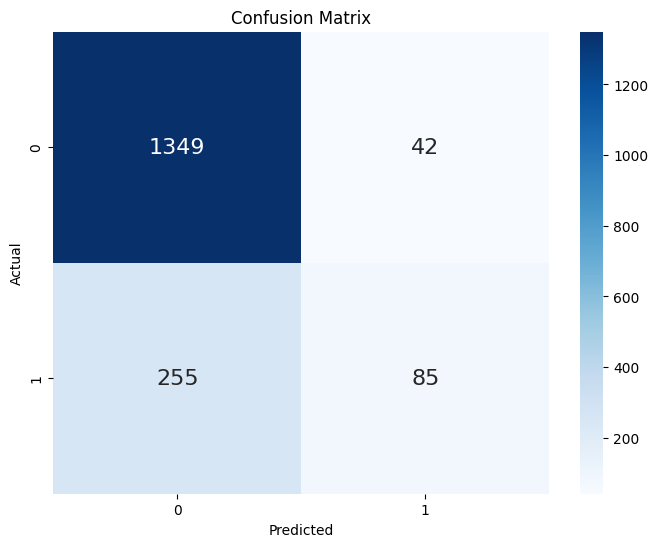

In [144]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [145]:
feature_importance = model.coef_[0]

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': scaled_X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.reindex(feature_importance_df.Importance.abs().sort_values(ascending=False).index)

print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                                    Feature  Importance
8                 types_of_patients_handled    3.965430
3                         pay_relative_stay    1.514646
1                   total_amount_reimbursed    1.095793
2                        avg_inpatient_time    1.049203
4                   no_unique_beneficiaries    0.974680
0                        total_no_of_claims    0.839964
7  pct_beneficiaries_did_not_pay_deductible    0.275504
6                         pct_male_patients    0.269481
5                       pct_female_patients    0.161427


# SMOTE:

In [146]:
over_sampling_smote = SMOTE()
model = LogisticRegression()

In [147]:
pipeline_SMOTE_Log = imbalanced_pipeline([
    ('SMOTE', over_sampling_smote),
     ('classification', model)
    ])

In [148]:
pipeline_SMOTE_Log.fit(scaled_X_train, y_train)

Pipeline(steps=[('SMOTE', SMOTE()), ('classification', LogisticRegression())])

In [149]:
predictions = pipeline_SMOTE_Log.predict(scaled_X_test)
predictions

array([0, 0, 0, ..., 0, 1, 1])

In [150]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7683419988445985

In [151]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1391
           1       0.43      0.57      0.49       340

    accuracy                           0.77      1731
   macro avg       0.66      0.69      0.67      1731
weighted avg       0.80      0.77      0.78      1731



In [152]:
print(confusion_matrix(y_test, predictions))

[[1135  256]
 [ 145  195]]


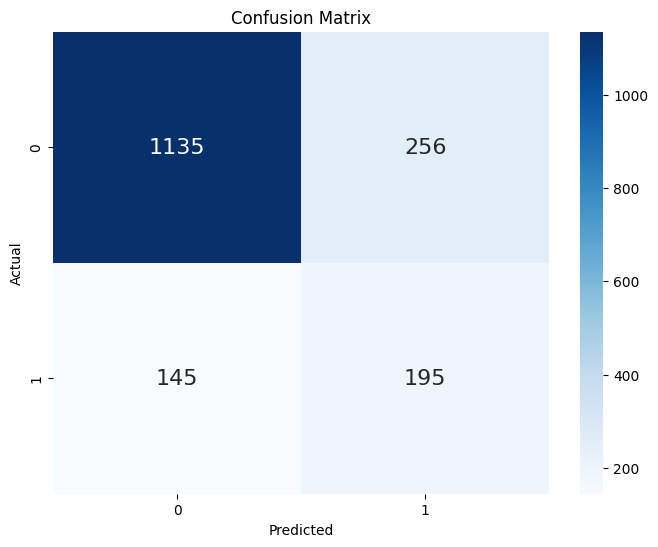

In [153]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree:

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV